# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Arafat Dhiya 'Ulhaq
- **Email:** arafatulhaq01@gmail.com
- **ID Dicoding:** arafat_ulhaq

# Dataset Information

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.


Dataset characteristics
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered



## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah peminjaman sepeda antara pengguna yang terdaftar (registered user) dan pengguna casual (casual user) beberapa bulan terakhir pada hari kerja (working day) dan tidak kerja?
- Bagaimana jumlah peminjaman sepeda pada jam tertentu antara pengguna yang terdaftar (registered user) dan pengguna casual (casual user)?
- Bagaimana permintaan peminjaman sepeda terhadap musim dan cuaca? bagaimana proporsi nya? manakah yang memiliki persentase tertinggi dan terendah?


## Import Packages/Library

In [181]:
import os
import zipfile

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

#### Downloading Data

In [182]:
# Download Data from Link Google Drive
!gdown 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset.zip
100% 280k/280k [00:00<00:00, 105MB/s]


In [183]:
# Unzip File dataset

!unzip "Bike-sharing-dataset.zip" -d "./"

Archive:  Bike-sharing-dataset.zip
  inflating: ./Readme.txt            
  inflating: ./day.csv               
  inflating: ./hour.csv              


### Gathering Data

Day bike sharing data

In [184]:
# Load data dan tampilkan 5 baris pertama dataset

day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Hour bike sharing data

In [185]:
# Load data dan tampilkan 5 baris pertama dataset

hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


dataset day dan hour memiliki kolom yang sama kecuali kolom hr di dataset day tidak tersedia

### Assessing Data

#### Day bike sharing data

In [186]:
day_df.shape # Melihat banyaknya baris dan kolom dari dataset

(731, 16)

In [187]:
day_df.info() # Melihat keseluruhan infomasi dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


beberapa feature pada kolom memiliki tipe data yang kurang tepat, contohnya dteday masih tipe object yang harusnya tipe data datetime

In [188]:
day_df.isna().sum() # Check missing value pada data

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada data day

In [189]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


Tidak terdapat duplikasi data day

In [190]:
day_df.describe() # Mendapatkan deskripsi statistik terhadap data day

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Hour bike sharing data

In [191]:
hour_df.shape  # Melihat banyaknya baris dan kolom dari dataset

(17379, 17)

In [192]:
hour_df.info() # Melihat keseluruhan infomasi dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


beberapa feature pada kolom memiliki tipe data yang kurang tepat, contohnya dteday masih tipe object yang harusnya tipe data datetime

In [193]:
hour_df.isna().sum() # Check missing value pada data

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [194]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum()) # check duplikasi data

Jumlah duplikasi data:  0


Tidak terdapat duplikasi data hour

In [195]:
hour_df.describe() # Mendapatkan deskripsi statistik terhadap data hour

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Kedua dataset tidak memiliki missing value dan duplikasi data, dan pada data hour lebih banyak memuat informasi yang cocok untuk menjawab pertanyaan analisis diatas, jadi selanjutnya hanya akan menggunakan data hour_df

### Cleaning Data

In [196]:
# mengubah nama data hour_df menjadi df agar lebih singkat
df = hour_df
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [197]:
# Drop feature instant karena tidak digunakan

df.drop(columns=['instant'], inplace = True)
df.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [198]:
# Mengubah tipe data yang kurang sesuai pada dataset

df['dteday'] = pd.to_datetime(df['dteday'])
df['season'] = df.season.astype('category')
df['yr'] = df.yr.astype('category')
df['mnth'] = df.mnth.astype('category')
df['hr'] = df.hr.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['workingday'] = df.workingday.astype('category')
df['weathersit'] = df.weathersit.astype('category')

In [199]:
# Decoding data pada kolom yang bertipe kategori berdasarkan informasi dataset

# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace = True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
df.yr.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace = True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace = True)

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace = True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
df.workingday.replace((0,1), ('No', 'Yes'), inplace = True)

In [200]:
# Merubah nama kolom

df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "hr" : "hour",
    "weathersit" : "weather",
    "hum" : "humidity",
    "casual" : "casual_user",
    "registered" : "registered_user",
    "cnt" : "count_user",}, inplace=True
)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             17379 non-null  datetime64[ns]
 1   season           17379 non-null  category      
 2   year             17379 non-null  category      
 3   month            17379 non-null  category      
 4   hour             17379 non-null  category      
 5   holiday          17379 non-null  category      
 6   weekday          17379 non-null  category      
 7   workingday       17379 non-null  category      
 8   weather          17379 non-null  category      
 9   temp             17379 non-null  float64       
 10  atemp            17379 non-null  float64       
 11  humidity         17379 non-null  float64       
 12  windspeed        17379 non-null  float64       
 13  casual_user      17379 non-null  int64         
 14  registered_user  17379 non-null  int64

In [202]:
df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual_user,registered_user,count_user
0,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

In [203]:
df.describe(include="all")

<ipython-input-203-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual_user,registered_user,count_user
count,17379,17379,17379.0,17379,17379.0,17379.0,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4,2.0,12,24.0,2.0,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Summer,2012.0,May,17.0,0.0,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496,8734.0,1488,730.0,16879.0,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Berikut adalah beberapa summary statistik diatas:

1. Jumlah total entri (rows) dalam dataset: 17379

2. Deskripsi Statistik untuk Kolom Numerik:

  **temp (Suhu)**:
  - Rata-rata: 0.496987
  - Standar Deviasi: 0.192556
  - Nilai Minimum: 0.020000
  - Kuartil Pertama (25%): 0.340000
  - Median (Kuartil Kedua/50%): 0.500000
  - Kuartil Ketiga (75%): 0.660000
  - Nilai Maksimum: 1.000000
  
  **atemp (Suhu Perasaan)**:
  - Rata-rata: 0.475775
  - Standar Deviasi: 0.171850
  - Nilai Minimum: 0.000000
  - Kuartil Pertama (25%): 0.333300
  - Median (Kuartil Kedua/50%): 0.484800
  - Kuartil Ketiga (75%): 0.621200
  - Nilai Maksimum: 1.000000
  
  **humidity (Kelembaban)**:
  - Rata-rata: 0.627229
  - Standar Deviasi: 0.192930
  - Nilai Minimum: 0.000000
  - Kuartil Pertama (25%): 0.480000
  - Median (Kuartil Kedua/50%): 0.630000
  - Kuartil Ketiga (75%): 0.780000
  - Nilai Maksimum: 1.000000
  
  **windspeed (Kecepatan Angin)**:
  - Rata-rata: 0.190098
  - Standar Deviasi: 0.122340
  - Nilai Minimum: 0.000000
  - Kuartil Pertama (25%): 0.104500
  - Median (Kuartil Kedua/50%): 0.194000
  - Kuartil Ketiga (75%): 0.253700
  - Nilai Maksimum: 0.850700
  
  **casual_user (Pengguna Casual)**:
  - Rata-rata: 35.676218
  - Standar Deviasi: 49.305030
  - Nilai Minimum: 0.000000
  - Kuartil Pertama (25%): 4.000000
  - Median (Kuartil Kedua/50%): 17.000000
  - Kuartil Ketiga (75%): 48.000000
  - Nilai Maksimum: 367.000000
  
  **registered_user (Pengguna Terdaftar)**:
  - Rata-rata: 153.786869
  - Standar Deviasi: 151.357286
  - Nilai Minimum: 0.000000
  - Kuartil Pertama (25%): 34.000000
  - Median (Kuartil Kedua/50%): 115.000000
  - Kuartil Ketiga (75%): 220.000000
  - Nilai Maksimum: 886.000000
  
  **count_user (Total Pengguna):**
  - Rata-rata: 189.463088
  - Standar Deviasi: 181.387599
  - Nilai Minimum: 1.000000
  - Kuartil Pertama (25%): 40.000000
  - Median (Kuartil Kedua/50%): 142.000000
  - Kuartil Ketiga (75%): 281.000000
  - Nilai Maksimum: 977.000000

3. Deskripsi Statistik untuk Kolom Kategorikal:

  **date (Tanggal)**:
  - Tanggal Pertama: 2011-01-01
  - Tanggal Terakhir: 2012-12-31
  
  **season (Musim)**:
  - Jumlah unik: 4
  - Musim paling sering: Summer
  - Frekuensi musim paling sering: 4496
  
  **year (Tahun)**:
  - Jumlah unik: 2
  - Tahun paling sering: 2012
  - Frekuensi tahun paling sering: 8734
  
  **month (Bulan)**:
  - Jumlah unik: 12
  - Bulan paling sering: May
  - Frekuensi bulan paling sering: 1488
  
  **hr (Jam)**:
  - Jumlah unik: 24
  - Jam paling sering: 17
  - Frekuensi jam paling sering: 730
  
  **holiday (Hari Libur)**:
  - Jumlah unik: 2
  - Nilai paling sering: 0.0
  - Frekuensi nilai paling sering: 16879
  
  **weekday (Hari dalam Seminggu)**:
  - Jumlah unik: 7
  - Hari paling sering: Saturday
  - Frekuensi hari paling sering: 2512
  
  **workingday (Hari Kerja)**:
  - Jumlah unik: 2
  - Nilai paling sering: Yes
  - Frekuensi nilai paling sering: 11865
  
  **weather (Cuaca)**:
  - Jumlah unik: 4
  - Cuaca paling sering: Clear
  - Frekuensi cuaca paling sering: 11413

In [204]:
df.describe(include="all")

<ipython-input-204-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual_user,registered_user,count_user
count,17379,17379,17379.0,17379,17379.0,17379.0,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4,2.0,12,24.0,2.0,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Summer,2012.0,May,17.0,0.0,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496,8734.0,1488,730.0,16879.0,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [205]:
# Jumlah Registered User
registered_user_sum = df['registered_user'].sum()

# Jumlah Casual User
casual_user_sum = df['casual_user'].sum()

# Jumlah User
count_user_sum = df['count_user'].sum()

# Membuat objek Series untuk masing-masing hasil
data_user = {
    'Registered User': registered_user_sum,
    'Casual User': casual_user_sum,
    'Count User': count_user_sum
}
data_result = pd.Series(data_user)

# Membuat DataFrame dari objek Series
total_user_df = pd.DataFrame(data_result, columns=['Total'])

# Menampilkan DataFrame hasil
total_user_df.T

,Registered User,Casual User,Count User
Total,2672662,620017,3292679


In [206]:
# Jumlah user berdasrkan season
df.groupby(by="season").count_user.sum()

season
Winter     471348
Spring     918589
Summer    1061129
Fall       841613
Name: count_user, dtype: int64

In [207]:
# Jumlah user berdasarkan tahun
df.groupby(by="year").count_user.sum()

year
2011    1243103
2012    2049576
Name: count_user, dtype: int64

In [208]:
# Jumlah user berdaskan bulan
df.groupby(by="month").count_user.sum()

month
Jan    134933
Feb    151352
Mar    228920
Apr    269094
May    331686
Jun    346342
Jul    344948
Aug    351194
Sep    345991
Oct    322352
Nov    254831
Dec    211036
Name: count_user, dtype: int64

In [209]:
# Jumlah user berdasarkan jam
df.groupby(by="hour").count_user.sum()

hour
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: count_user, dtype: int64

In [210]:
# Jumlah user terhadap cuaca
df.groupby(by="weather").count_user.sum()

weather
Clear             2338173
Misty              795952
Light_RainSnow     158331
Heavy_RainSnow        223
Name: count_user, dtype: int64

In [211]:
# Jumlah user berdasarkan workingday
df.groupby(by="workingday").count_user.sum()

workingday
No     1000269
Yes    2292410
Name: count_user, dtype: int64

In [212]:
# Jumlah user berdasarkan weekday
df.groupby(by="weekday").count_user.sum()

weekday
Sunday       444027
Monday       455503
Tuesday      469109
Wednesday    473048
Thursday     485395
Friday       487790
Saturday     477807
Name: count_user, dtype: int64

In [213]:
# Jumlah user berdasarkan hari libur
df.groupby(by="holiday").count_user.sum()

holiday
0    3214244
1      78435
Name: count_user, dtype: int64

In [214]:
# Melihat perbandingan registered user dan casual user pada hari kerja dan tidak kerja

casual_registered_workingday_df = df.groupby(['year', 'month', 'workingday'])[['casual_user', 'registered_user', 'count_user']].sum()
casual_registered_workingday_df

casual_user  registered_user  count_user
year month workingday                                          
2011 Jan   No                 1680             9500       11180
           Yes                1393            25616       27009
     Feb   No                 3623            10991       14614
           Yes                2619            30982       33601
     Mar   No                 6384            10624       17008
           Yes                6442            40595       47037
     Apr   No                12074            19981       32055
           Yes               10272            52543       62815
     May   No                16374            28095       44469
           Yes               14676            76676       91352
     Jun   No                13898            26146       40044
           Yes               16714            86754      103468
     Jul   No                20826            32095       52921
           Yes               15626            72794       88420
     Aug   No                10465            20097       30562
           Yes               18377            87752      106129
     Sep   No                15182            27202       42384
           Yes               11363            73671       85034
     Oct   No                14949            29340       44289
           Yes               10273            68949       79222
     Nov   No                 9176            24368       33544
           Yes                6418            62205       68623
     Dec   No                 4267            19502       23769
           Yes                4181            59373       63554
2012 Jan   No                 5029            24808       29837
           Yes                3940            62967       66907
     Feb   No                 4354            21380       25734
           Yes                4367            73036       77403
     Mar   No                14520            30329       44849
           Yes               17098           102928      120026
     Apr   No                20678            36526       57204
           Yes               17778            99242      117020
     May   No                24234            37148       61382
           Yes               20001           114482      134483
     Jun   No                22481            42092       64573
           Yes               20813           117444      138257
     Jul   No                19104            41493       60597
           Yes               22601           120409      143010
     Aug   No                15828            33025       48853
           Yes               27369           138281      165650
     Sep   No                25953            54027       79980
           Yes               17825           120768      138593
     Oct   No                17597            40329       57926
           Yes               16941           123974      140915
     Nov   No                11738            35588       47326
           Yes                9271            96067      105338
     Dec   No                 6318            28851       35169
           Yes                6927            81617       88544

In [215]:
# Melihat perbandingan casual user dan registered user berdasarkan jam

hour_casual_registered_df = df.groupby(by=["hour"]).agg({
    "casual_user": "sum",
    "registered_user": "sum"
})

hour_casual_registered_df

,casual_user,registered_user
hour,,
0,7375,31755
1,4709,19455
2,3412,12940
3,1893,6281
4,874,3554
5,1012,13249
6,3017,52115
7,8037,146134
8,15761,245240


In [216]:
# Melihat proporsi perbandingan user berdasarkan tiap musim (season)

df.groupby(by=["season"]).agg({
    "count_user": "count",
})

,count_user
season,
Winter,4242
Spring,4409
Summer,4496
Fall,4232


In [217]:
# Melihat proposi perbandingan user berdasarkan tiap cuaca (weather)

df.groupby(by=["weather"]).agg({
    "count_user": "count",
})

,count_user
weather,
Clear,11413
Misty,4544
Light_RainSnow,1419
Heavy_RainSnow,3


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi jumlah peminjaman sepeda antara pengguna yang terdaftar (registered user) dan pengguna casual (casual user) beberapa bulan terakhir pada hari kerja (working day) dan tidak kerja?

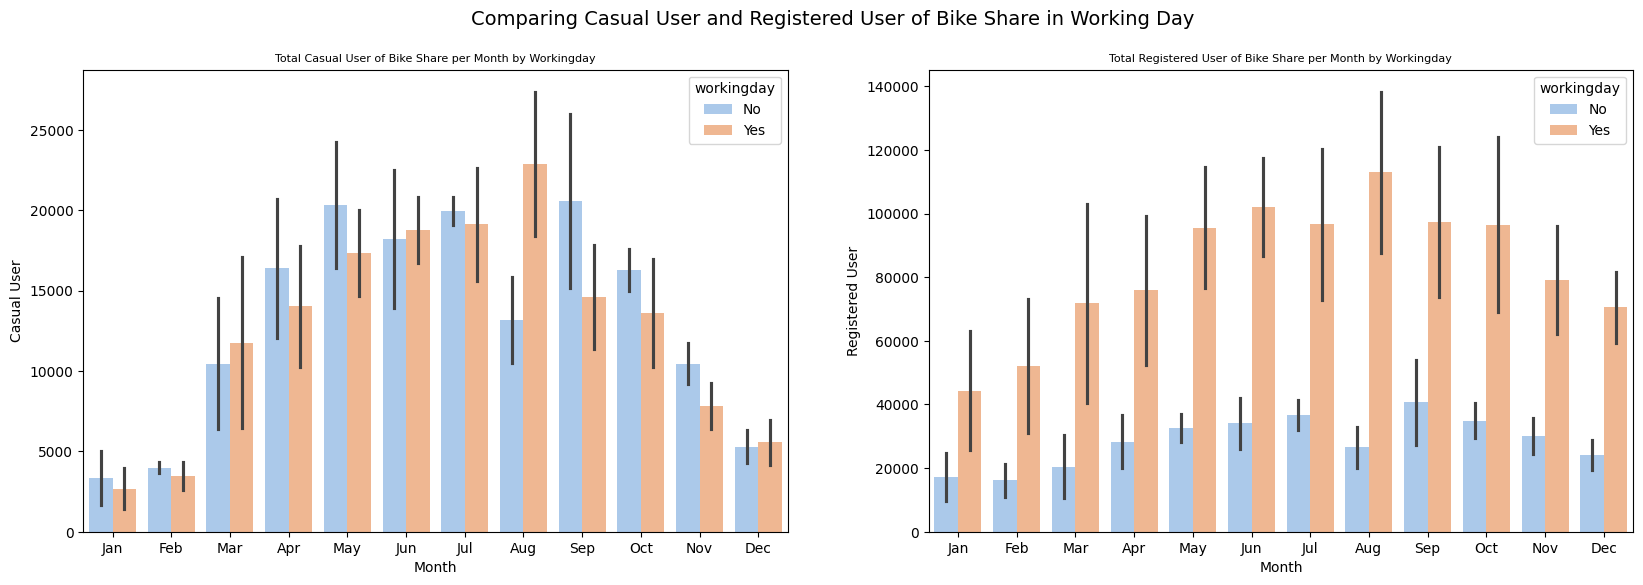

In [218]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.barplot(x='month', y='casual_user', data=casual_registered_workingday_df, hue='workingday', ax=ax[0])
ax[0].set_ylabel("Casual User")
ax[0].set_xlabel("Month")
ax[0].set_title("Total Casual User of Bike Share per Month by Workingday", loc="center", fontsize=8)

sns.barplot(x='month', y='registered_user', data=casual_registered_workingday_df, hue='workingday', ax=ax[1])
ax[1].set_ylabel("Registered User")
ax[1].set_xlabel("Month")
ax[1].set_title("Total Registered User of Bike Share per Month by Workingday", loc="center", fontsize=8)

plt.suptitle("Comparing Casual User and Registered User of Bike Share in Working Day", fontsize=14)
plt.show()

Berdasarkan visualisasi diatas, terlihat distirubsi perbandingan bahwa registered user lebih banyak meminjam sepeda disaat hari kerja, terbanyak pada bulan agustus, sedangkan casual user cenderung lebih banyak meminjam pada hari tidak kerja, terbanyak ada pada bulan may dan september.

### Pertanyaan 2: Bagaimana jumlah peminjaman sepeda pada jam tertentu antara pengguna yang terdaftar (registered user) dan pengguna casual (casual user)?

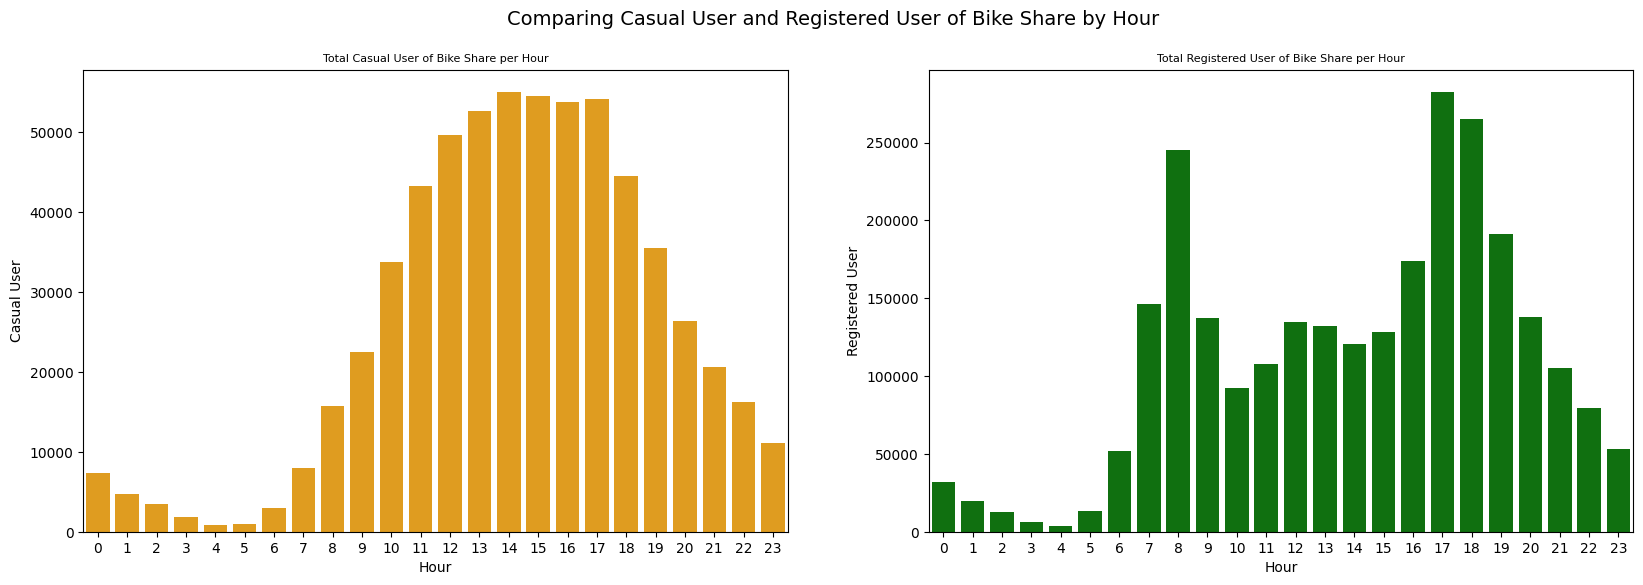

In [219]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.barplot(x='hour', y='casual_user', data=hour_casual_registered_df, color='orange', ax=ax[0])
ax[0].set_ylabel("Casual User")
ax[0].set_xlabel("Hour")
ax[0].set_title("Total Casual User of Bike Share per Hour", loc="center", fontsize=8)

sns.barplot(x='hour', y='registered_user', data=hour_casual_registered_df, color='green', ax=ax[1])
ax[1].set_ylabel("Registered User")
ax[1].set_xlabel("Hour")
ax[1].set_title("Total Registered User of Bike Share per Hour", loc="center", fontsize=8)

plt.suptitle("Comparing Casual User and Registered User of Bike Share by Hour", fontsize=14)
plt.show()

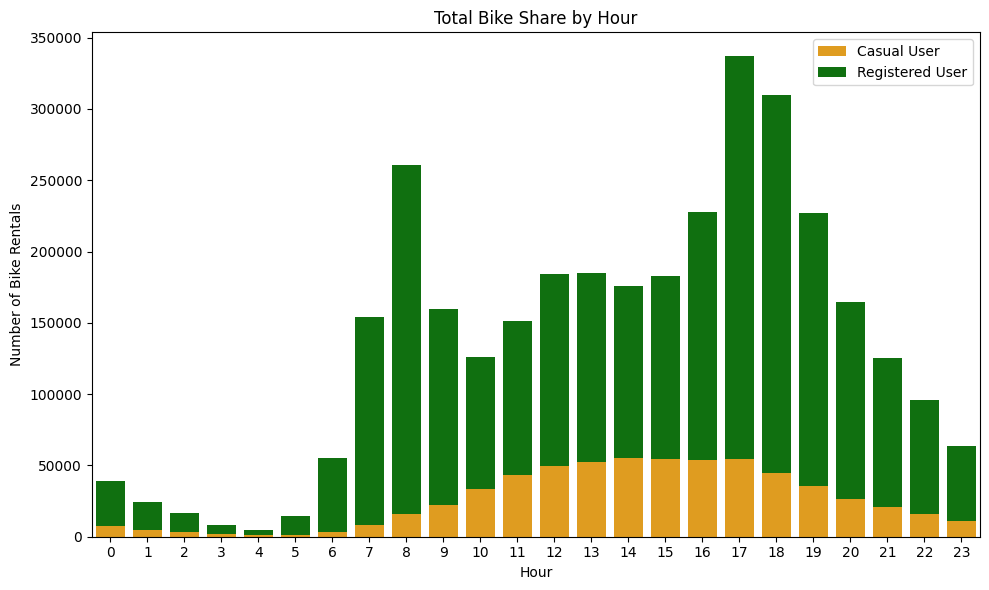

In [220]:
# Menggunakan bar chart yang distack
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='casual_user', data=hour_casual_registered_df, color='orange', label='Casual User')
sns.barplot(x='hour', y='registered_user', data=hour_casual_registered_df, color='green', label='Registered User', bottom=hour_casual_registered_df['casual_user'])

plt.xlabel('Hour')
plt.ylabel('Number of Bike Rentals')
plt.title('Total Bike Share by Hour')
plt.legend()
plt.tight_layout()
plt.show()

Dari hasil visualisasi diatas, terlihat perbedaan distribusi jam peminjaman sepeda antara casual user dan registered user, casual user cenderung banyak meminjam sepeda pada jam 11 hingga jam 18 (6 sore), sedangkan registered user cenderung banyak meminjam sepeda pada jam 8,jam 17 dan jam 18.

### Pertanyaan 3: Bagaimana permintaan peminjaman sepeda terhadap musim dan cuaca? bagaimana proposi nya? manakah yang memiliki persentase tertinggi dan terendah?

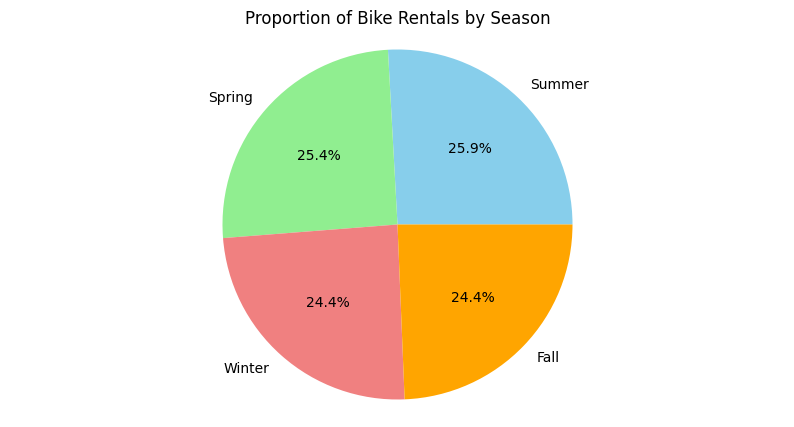

In [221]:
# Proporsi peminjaman sepeda berdasarkan musim (season)
season_counts = df['season'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Proportion of Bike Rentals by Season')
plt.axis('equal')
plt.show()

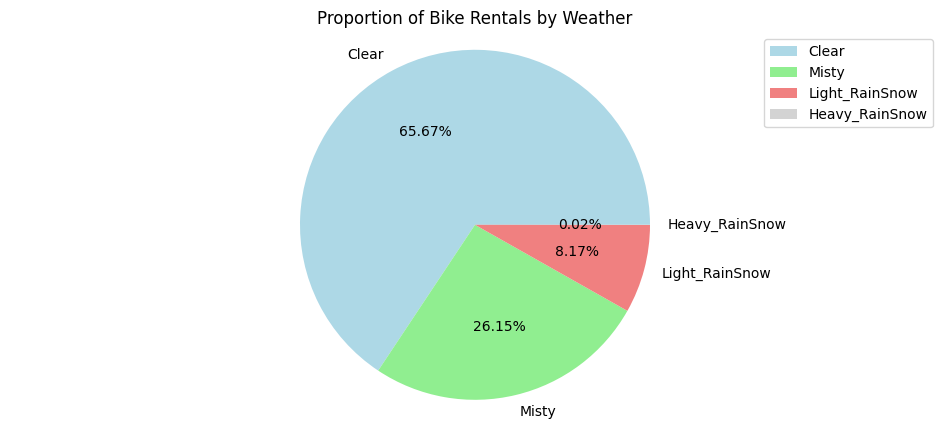

In [222]:
# Proporsi peminjaman sepeda berdasarkan cuaca (weather)
weather_counts = df['weather'].value_counts()
plt.figure(figsize=(12, 5))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.2f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightgrey'])
plt.title('Proportion of Bike Rentals by Weather')
plt.axis('equal')
plt.legend()
plt.show()

Dari hasil visualisasi diatas, terlihat bahwa proporsi peminjaman sepeda terhadap 4 musim terjadi seimbang, tetapi berdasarkan cuaca, tertinggi ada pada cuaca cerah (clear) dengan proporsi 65.67% dan terendah 0.02% pada cuaca hujan berat (heavy_snow)

## Conclusion

**Conclution pertanyaan 1**: Bagaimana distribusi jumlah peminjaman sepeda antara pengguna yang terdaftar (registered user) dan pengguna casual (casual user) beberapa bulan terakhir pada hari kerja (working day) dan tidak kerja?

*   Pengguna terdaftar lebih banyak meminjam sepeda pada hari kerja dibandingkan pengguna casual.
*   Pengguna casual lebih banyak meminjam sepeda pada hari tidak kerja dibandingkan pengguna terdaftar.
*   Puncak peminjaman untuk pengguna terdaftar terjadi pada bulan Agustus, sedangkan untuk pengguna casual terjadi pada bulan Mei dan September.
*   Hari kerja memiliki dampak signifikan pada pola peminjaman sepeda.
*   Registered user lebih mengandalkan sepeda sebagai sarana transportasi sehari-hari saat bekerja.
*   Casual user lebih memilih meminjam sepeda untuk rekreasi atau kegiatan di luar jam kerja.

    Rekomendasi Action:
    - Promosi Hari Kerja: Untuk meningkatkan peminjaman sepeda pada hari kerja, perusahaan bisa mengadakan promosi khusus untuk registered user, seperti diskon atau bonus poin.
    - Event Hari Tidak Kerja: Pada hari tidak kerja, perusahaan bisa mengadakan event khusus untuk casual user, seperti tur sepeda atau acara komunitas.

**Conclution pertanyaan 2**: Bagaimana jumlah peminjaman sepeda pada jam tertentu antara pengguna yang terdaftar (registered user) dan pengguna casual (casual user)?

*   Pengguna casual cenderung meminjam sepeda pada jam 11 hingga 18 (6 sore).
*   Pengguna terdaftar cenderung meminjam sepeda pada jam 8, 17, dan 18.
*   Pengguna casual kemungkinan besar menggunakan sepeda untuk rekreasi, sehingga mereka meminjamnya pada siang dan sore hari.
*   Pengguna terdaftar kemungkinan besar menggunakan sepeda untuk bekerja, sehingga mereka meminjamnya pada pagi hari dan jam pulang kerja.

    Rekomendasi Action:
    - Promosi Jam Sibuk: Perusahaan bisa mengadakan promosi khusus untuk registered user pada jam-jam sibuk, seperti diskon sewa sepeda pada jam 8 pagi dan 5-6 sore.
    - Penyuluhan Casual User: Berikan informasi lebih lanjut kepada casual user tentang manfaat bersepeda pada jam-jam tertentu, misalnya menjelang sore hari.
    - Penyediaan Sepeda: Pastikan ketersediaan sepeda yang cukup pada jam-jam puncak peminjaman.


**Conclution pertanyaan 3**: Bagaimana permintaan peminjaman sepeda terhadap musim dan cuaca? bagaimana proposi nya? manakah yang memiliki persentase tertinggi dan terendah?

*   Permintaan peminjaman sepeda tidak menunjukkan perbedaan yang signifikan antar musim.
*   Permintaan peminjaman sepeda sangat terpengaruh oleh cuaca.
*   Cuaca cerah memiliki proporsi peminjaman tertinggi (65,67%), sedangkan cuaca hujan lebat memiliki proporsi terendah (0,02%).

    Rekomendasi Action:
    - Operator penyedia layanan sewa sepeda perlu mempertimbangkan faktor cuaca dalam memprediksi permintaan dan mengatur ketersediaan armada.

# Save Fix Data

In [223]:
df.to_csv("main_data.csv", index=False)